# Decision tree

In [1]:
import numpy as np

def load_data_set(data_set_name: str):
    print("loading %s" % data_set_name)
    data = np.genfromtxt("test/%s.csv" % data_set_name, dtype=None, delimiter=',', names=True)
    xs = np.array([np.array(i.tolist())[:-1] for i in data], dtype=float)
    ys = np.array([i[data.dtype.names.index('y')] for i in data])
    return (xs, ys)

datasets = [[load_data_set("{:02}_{}".format(n, type)) for type in ["train", "test"]] for n in range(1, 22)]


loading 01_train
loading 01_test
loading 02_train
loading 02_test
loading 03_train
loading 03_test
loading 04_train
loading 04_test
loading 05_train
loading 05_test
loading 06_train
loading 06_test
loading 07_train
loading 07_test
loading 08_train
loading 08_test
loading 09_train
loading 09_test
loading 10_train
loading 10_test
loading 11_train
loading 11_test
loading 12_train
loading 12_test
loading 13_train
loading 13_test
loading 14_train
loading 14_test
loading 15_train
loading 15_test
loading 16_train
loading 16_test
loading 17_train
loading 17_test
loading 18_train
loading 18_test
loading 19_train
loading 19_test
loading 20_train
loading 20_test
loading 21_train
loading 21_test


## Best scores

In [2]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from tqdm.notebook import tqdm

criterions = ["gini", "entropy"]
splitters = ["best", "random"]
heights = [x for x in range(1, 21)]

def get_score(n: int, criterion: str, splitter: str, height: int, pbar: tqdm=None):
    train, test = datasets[n]
    dtc = DecisionTreeClassifier(criterion=criterion, splitter=splitter, max_depth=height)
    dtc.fit(*train)
    results = dtc.predict(test[0])
    if pbar is not None:
        pbar.update(1)
    return accuracy_score(test[1], results)

def get_train_score(n: int, criterion: str, splitter: str, height: int, pbar: tqdm=None):
    train, test = datasets[n]
    dtc = DecisionTreeClassifier(criterion=criterion, splitter=splitter, max_depth=height)
    dtc.fit(*train)
    results = dtc.predict(train[0])
    if pbar is not None:
        pbar.update(1)
    return accuracy_score(train[1], results)

pbar = tqdm(total=len(datasets)*len(criterions)*len(splitters)*len(heights))

best_scores = [
    max(
        (get_score(n, criterion, splitter, height, pbar), "{} {} {} {}".format(n, criterion, splitter, height))
        for criterion in criterions
        for splitter in splitters
        for height in heights
    ) for n in range(len(datasets))
]

pbar.close()

for i in best_scores:
    print(i)


(0.9997429966589566, '0 entropy best 3')
(0.7, '1 entropy best 9')
(1.0, '2 gini best 2')
(0.9951304347826087, '3 entropy best 5')
(0.9956709956709957, '4 gini random 6')
(0.9988962472406181, '5 entropy best 3')
(0.9967441860465116, '6 entropy best 3')
(0.997920997920998, '7 gini best 2')
(0.8509803921568627, '8 entropy best 5')
(0.9979879275653923, '9 entropy best 4')
(0.999195171026157, '10 gini best 1')
(0.8762278978388998, '11 entropy best 10')
(0.6486238532110091, '12 entropy best 7')
(0.990351215746816, '13 entropy best 5')
(1.0, '14 gini best 1')
(1.0, '15 gini best 1')
(0.8464544946957008, '16 entropy best 7')
(0.9426656738644825, '17 entropy best 5')
(0.8402100525131283, '18 entropy best 7')
(0.9694928684627575, '19 entropy best 7')
(0.8110336081166772, '20 entropy best 15')


## Scores with no height limit

In [3]:
print("test set scores")

pbar = tqdm(total=len(datasets)*len(criterions)*len(splitters))

limitless_scores = [
    max(
        (get_score(n, criterion, splitter, None, pbar), "{} {} {}".format(n, criterion, splitter))
        for criterion in criterions
        for splitter in splitters
    ) for n in range(len(datasets))
]

for i in limitless_scores:
    print(i)

pbar.close()

print("\n------------------------------\ntrain set scores")

pbar = tqdm(total=len(datasets)*len(criterions)*len(splitters))

limitless_scores = [
    max(
        (get_train_score(n, criterion, splitter, None, pbar), "{} {} {}".format(n, criterion, splitter))
        for criterion in criterions
        for splitter in splitters
    ) for n in range(len(datasets))
]

for i in limitless_scores:
    print(i)

pbar.close()

test set scores


(0.9390902081727063, '0 entropy best')
(0.6755725190839694, '1 entropy best')
(0.944069431051109, '2 gini best')
(0.952695652173913, '3 entropy best')
(0.9718614718614719, '4 gini best')
(0.9437086092715232, '5 gini best')
(0.94, '6 entropy best')
(0.9833679833679834, '7 gini best')
(0.796078431372549, '8 entropy best')
(0.9336016096579477, '9 gini best')
(0.9428571428571428, '10 entropy best')
(0.8675273645804098, '11 entropy best')
(0.6055045871559633, '12 entropy best')
(0.9471246622925511, '13 entropy best')
(0.9507507507507508, '14 entropy random')
(0.9504672897196261, '15 entropy best')
(0.8090452261306532, '16 entropy best')
(0.9084139985107967, '17 entropy best')
(0.795198799699925, '18 entropy best')
(0.9263074484944532, '19 gini best')
(0.7945466074825618, '20 entropy best')


------------------------------
train set scores


(1.0, '0 gini random')
(1.0, '1 gini random')
(1.0, '2 gini random')
(1.0, '3 gini random')
(1.0, '4 gini random')
(1.0, '5 gini random')
(1.0, '6 gini random')
(1.0, '7 gini random')
(1.0, '8 gini random')
(1.0, '9 gini random')
(1.0, '10 gini random')
(1.0, '11 gini random')
(1.0, '12 gini random')
(1.0, '13 gini random')
(1.0, '14 gini random')
(1.0, '15 gini random')
(1.0, '16 gini random')
(1.0, '17 gini random')
(1.0, '18 gini random')
(1.0, '19 gini random')
(1.0, '20 gini random')



## Height dependency graphics

lowest height: 1 `(0.999194631222151, '10 gini best 1')`

highest height: 10 `(0.8797399074936354, '11 entropy best 10')`

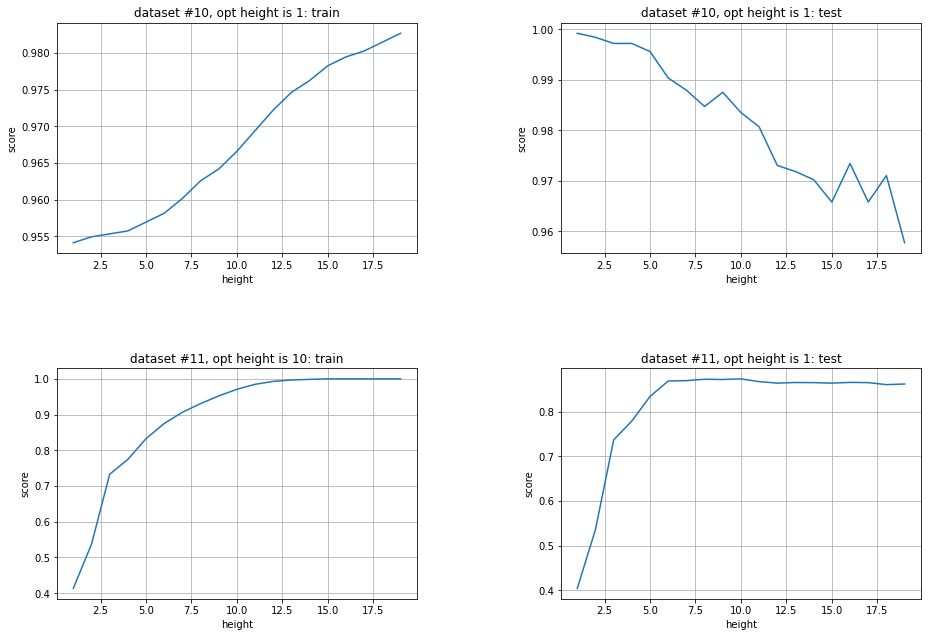

In [4]:
import matplotlib.pyplot as plt

def add_dependency_plot(title, xlabel, ylabel, index, results):
    ax = plt.subplot(2, 2, index + 1)
    ax.title.set_text(title)
    plt.plot([x[0] for x in results], [x[1] for x in results])
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plt.grid(True)

add_dependency_plot("dataset #10, opt height is 1: train", "height", "score", 0, [(x, get_train_score(10, "gini", "best", x)) for x in range(1, 20)])
add_dependency_plot("dataset #10, opt height is 1: test", "height", "score", 1, [(x, get_score(10, "gini", "best", x)) for x in range(1, 20)])
add_dependency_plot("dataset #11, opt height is 10: train", "height", "score", 2, [(x, get_train_score(11, "entropy", "best", x)) for x in range(1, 20)])
add_dependency_plot("dataset #11, opt height is 1: test", "height", "score", 3, [(x, get_score(11, "entropy", "best", x)) for x in range(1, 20)])

plt.subplots_adjust(top=2.0, bottom=0, left=0, right=2, hspace=0.5, wspace=0.4)
plt.show()

In [41]:
from random import randrange

def get_tree(xs: np.array, ys: np.array, criterion: str, splitter: str) -> DecisionTreeClassifier:
    dtc = DecisionTreeClassifier(criterion=criterion, splitter=splitter)
    dtc.fit(xs, ys)
    return dtc

def get_subtree(xs: np.array, ys: np.array, subset_size: int) -> (np.array, np.array):
    subset = set()
    while len(subset) < subset_size:
      subset.add(randrange(len(xs)))
    sub_xs, sub_ys = [xs[i] for i in subset], [ys[i] for i in subset]
    return (np.array(sub_xs), np.array(sub_ys))

def get_forest_score(i: int, criterion: str, splitter: str) -> float:
    train, test = datasets[i]
    trees_count = 3
    sub_size = len(train[0]) * 1.5 / trees_count
    result = np.array([0 for i in range(len(test[0]))])

    for i in range(trees_count):
      sub_xs, sub_ys = get_subtree(train[0], train[1], sub_size)
      tree = get_tree(sub_xs, sub_ys, criterion, splitter)
      result += tree.predict(test[0])

    result = [int(x / trees_count) for x in result]
    return accuracy_score(result, test[1])

best_scores = [
    max(
        (get_forest_score(n, criterion, splitter), "{} {} {}".format(n, criterion, splitter))
        for criterion in criterions
        for splitter in splitters
    ) for n in range(len(datasets))
]

for i in best_scores:
    print(i)

(0.8396299151888974, '0 entropy best')
(0.4870229007633588, '1 entropy best')
(0.8625843780135005, '2 gini best')
(0.8869565217391304, '3 gini best')
(0.948051948051948, '4 entropy best')
(0.9304635761589404, '5 entropy best')
(0.866046511627907, '6 entropy best')
(0.9937629937629938, '7 entropy best')
(0.6215686274509804, '8 entropy best')
(0.8519114688128773, '9 entropy best')
(0.8780684104627766, '10 gini best')
(0.7662082514734774, '11 entropy best')
(0.4944954128440367, '12 entropy best')
(0.8452335005789271, '13 gini best')
(0.8246246246246246, '14 entropy best')
(0.8872274143302181, '15 gini best')
(0.6683417085427136, '16 entropy best')
(0.7952345495160089, '17 entropy best')
(0.6031507876969242, '18 entropy best')
(0.805863708399366, '19 gini best')
(0.5389980976537729, '20 gini best')
